<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Exersise_2a_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercixe 2a - Task 1

Generate multivariate normal (MVN) simulated data with 4 features and 2 classes. Use the posted code ExampleMVN.py. 

The parameter set consists of the mean, the covariance matrix and the number of samples in the two classes.

 Generate samples for three different parameter sets.

### Program to generate a Multivariate Normal Distribution

In [54]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

We will generate 2 classes of data, each with the same number of features.

Then we concatenate both classes into a single Dataframe

This is useful to do Cluster analysis, as the Clustering method should be able to identify each Class separately

In [2]:
def mvn(mean1 = 0, mean2 = 0, stdev1 = 1, stdev2 = 1, corr = 0, n1 = 100, n2 = 200):
  '''
  Generate data from MVN; two classes, four features each 
  (note that each Class is itself a Multinomial distrib with 4 correlated Normals)
  (we can see each class as a cluster of correlatted variables, so in essence we will have 2 clusters)
  Specify the mean vector and the covariance matrix, for each class
  Lastly, it concatenates both classes into a single DataFrame. 
  (Note that we end up with s single DF with 4 features, this DF has 'hidden' internally 2 clusters)

  '''

  #******* Parameters for Class I ***********

  #Mean
  muC1 = mean1 

  # Correlation matrix (must be symmetric and have 1's on the diagonal)
  corC1 = corr 

  # Covariance matrix

  # Sigmas (standard deviation) for each feature.
  DG = stdev1 

  # X' V X
  temp = np.matmul(DG, corC1)  
  covC1 = np.matmul(temp, DG)


  #******* Parameters for Class II ***********

  #Mean
  muC2 = mean2

  # Covariance matrix

  # Sigmas (standard deviation) for each feature.
  DG = stdev2 #np.diag([3.0, 3.0, 3.0,3.0])

  temp = np.matmul(DG, corC1) #uses the same Correlation matrix as the first sample (for simplicity)
  covC2 = np.matmul(temp, DG)


  #******** Generate random samples, and put both classes in a single dataframe
  # Sample size for each class
  NSamples1 = n1
  NSamples2 = n2
          
  #***********************************
  # Create columns, with class labels
  Class1 = np.ones((NSamples1,1))
  Class2 = np.full((NSamples2,1), 2)

  #***********************************
  #Create the Multinormal for each Class, create a Df for each class, and then concatenate both DFs

  #Class1
  data1 = np.random.multivariate_normal(muC1, covC1, NSamples1)
  Cdata1 = np.c_[data1, Class1]   #https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exactly
  df1 = pd.DataFrame(Cdata1, columns=["X1", "X2", "X3", "X4","labels"])

  #Class 2
  data2 = np.random.multivariate_normal(muC2, covC2, NSamples2)
  Cdata2 = np.c_[data2, Class2]
  df2 = pd.DataFrame(Cdata2, columns=["X1", "X2", "X3", "X4","labels"])


  #***********************************
  # Concatenate the two sets of samples
  dfM = df1.append(df2, ignore_index=True)

  return dfM


### Generate Samples for Three Different Parameter Sets

#### Parameter Set 1

In [39]:
# Create Mutivariate Distributions
mu1 = [0, 2, 3, 4]
mu2 = [0, -2, -3, -4]
stdev_1 = np.diag([1, 1.6, 2.2,2.2])
stdev_2 = np.diag([3.0, 4.0, 5.0,6.0])
correl = [(1.0, 0.9, 0.9, 0.9),
          (0.9, 1.0, 0.9, 0.9),
          (0.9, 0.9, 1.0, 0.9),
          (0.9, 0.9, 0.9, 1.0),
           ]
n_1 = 100
n_2 = 200

dfM1 = mvn(mean1 = mu1, mean2 = mu2, stdev1 = stdev_1, stdev2 = stdev_2, corr = correl, n1 = n_1, n2 = n_2)
dfM1.head()

,X1,X2,X3,X4,labels
0,1.643967,4.137662,6.292968,4.795445,1.0
1,-0.340940,0.714464,1.220459,2.100141,1.0
2,0.206929,1.911203,2.710638,3.979217,1.0
3,0.162049,2.077611,3.370735,4.714785,1.0
4,0.037899,2.608861,3.336802,4.266549,1.0


In [40]:
dfM1.shape

(300, 5)

<Figure size 432x288 with 0 Axes>

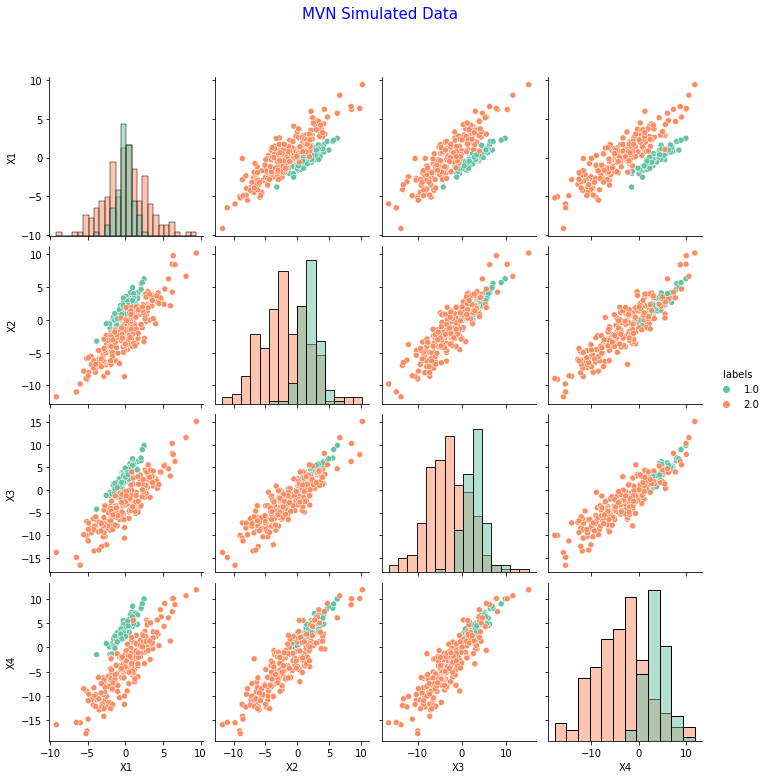

In [41]:
# Plot Multivariate Distributions

# Pairplot
plt.figure(0)
f0 = sns.pairplot(dfM1, hue="labels", palette="Set2", diag_kind="hist")
f0.fig.suptitle("MVN Simulated Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

#### Parameter Set 2

In [63]:
# Create Mutivariate Distributions
mu1 = [10, 20, 30, 40]
mu2 = [8, 19, 29, 39]
stdev_1 = np.diag([2.0, 1.6, 2.2,2.2])
stdev_2 = np.diag([4.0, 4.0, 5.0,6.0])
correl = [(1.0, 0.5, 0.5, 0.5),
          (0.5, 1.0, 0.1, 0.5),
          (0.5, 0.1, 1.0, 0.5),
          (0.5, 0.5, 0.5, 1.0),
           ]
n_1 = 1000
n_2 = 2000

dfM2 = mvn(mean1 = mu1, mean2 = mu2, stdev1 = stdev_1, stdev2 = stdev_2, corr = correl, n1 = n_1, n2 = n_2)
dfM2.head()

,X1,X2,X3,X4,labels
0,8.733984,18.944573,31.180910,41.722978,1.0
1,4.762306,15.645412,32.260447,37.523648,1.0
2,12.323782,21.001855,33.967385,45.204929,1.0
3,12.023158,22.815785,30.866041,41.373117,1.0
4,5.916693,18.139442,26.367651,35.945835,1.0


In [64]:
dfM2.shape

(3000, 5)

<Figure size 432x288 with 0 Axes>

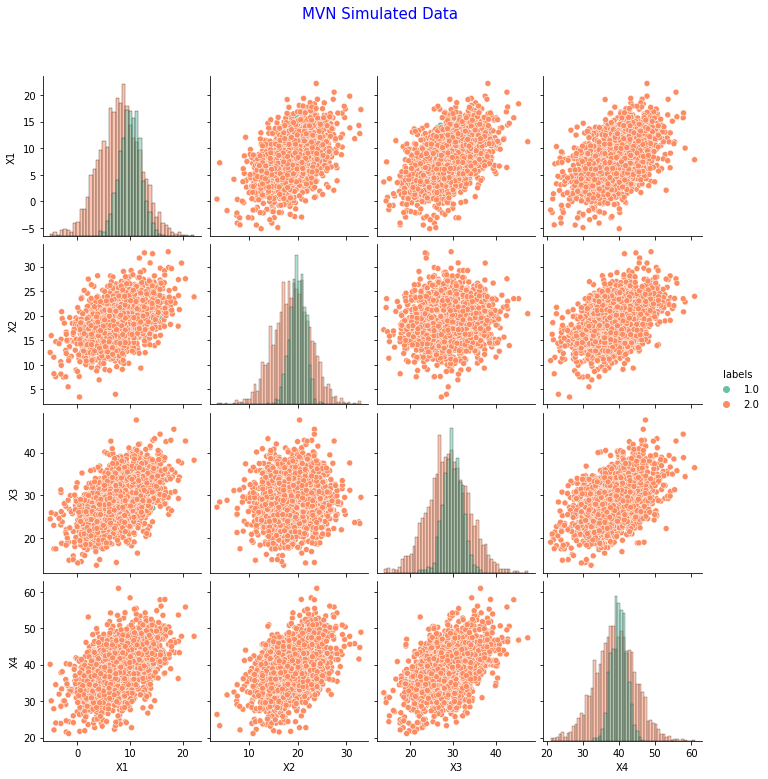

In [65]:
# Plot Multivariate Distributions

# Pairplot
plt.figure(0)
f0 = sns.pairplot(dfM2, hue="labels", palette="Set2", diag_kind="hist")
f0.fig.suptitle("MVN Simulated Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

#### Parameter Set 3

In [9]:
# Create Mutivariate Distributions
mu1 = [5, 20, 15, 40]
mu2 = [0, 5, 1, 3]
stdev_1 = np.diag([3.0, 2.0, 3.0,3.0])
stdev_2 = np.diag([6.0, 5.0, 8.0,7.0])

correl = [(1.0, 0.3, 0.2, 0.4),
          (0.3, 1.0, 0.1, 0.1),
          (0.2, 0.1, 1.0, 0.1),
          (0.4, 0.1, 0.1, 1.0),
           ]
n_1 = 500
n_2 = 500

dfM3 = mvn(mean1 = mu1, mean2 = mu2, stdev1 = stdev_1, stdev2 = stdev_2, corr = correl, n1 = n_1, n2 = n_2)
dfM3.head()

,X1,X2,X3,X4,labels
0,2.085626,17.574972,21.045955,38.179438,1.0
1,2.669870,22.562205,15.899532,36.746663,1.0
2,4.524597,22.940987,13.415876,39.981135,1.0
3,4.796062,22.246460,12.925318,37.783428,1.0
4,5.793169,20.682153,17.730350,39.588899,1.0


In [10]:
dfM3.shape

(1000, 5)

<Figure size 432x288 with 0 Axes>

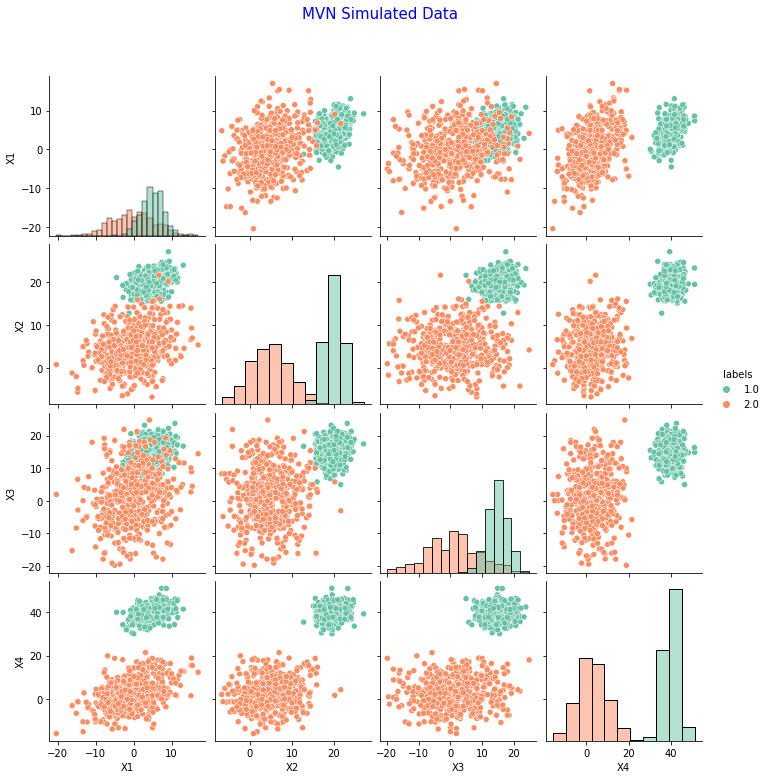

In [11]:
# Plot Multivariate Distributions

# Pairplot
plt.figure(0)
f0 = sns.pairplot(dfM3, hue="labels", palette="Set2", diag_kind="hist")
f0.fig.suptitle("MVN Simulated Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

## Naive Bayes Classifier

Excellent explanation here:

https://www.youtube.com/watch?v=Q8l0Vip5YUw

https://www.youtube.com/watch?v=O2L2Uv9pdDA

* Supervised Learning algorithm: we need X data (features) and Y data (labels)
* It is a classification algorithm, so we need to show it samples of data containing the feature we want (for example 'cats') and the feature we don't want (for example, show it some data of dogs)
* The algo answers the question: "given that we have a ceertain feature (for example whiskers) what is the probability that it is a cat?"
* It is called "naive" because it assumes that features are independent of each other (that's why we can use the Bayes Thm)

#### Task
Implement classification using Naive Bayes’ classifier, for each of the above generated data sets

* Split the data into train-test set in 70-30 ratio.

* Train the classifier with the train data set.

* Assess the accuracy of the classifier, on the test data set, with measures such as confussion matrix, precision, recall and F-score.

* Comment on how the classifier accuracy changes when you change the correlation between features.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

### Data Set 1

Split the data into train-test set in 70-30 ratio.

In [52]:
dfM = dfM1
TrainData, TestData = train_test_split(dfM, test_size=0.3, shuffle=True)

<Figure size 432x288 with 0 Axes>

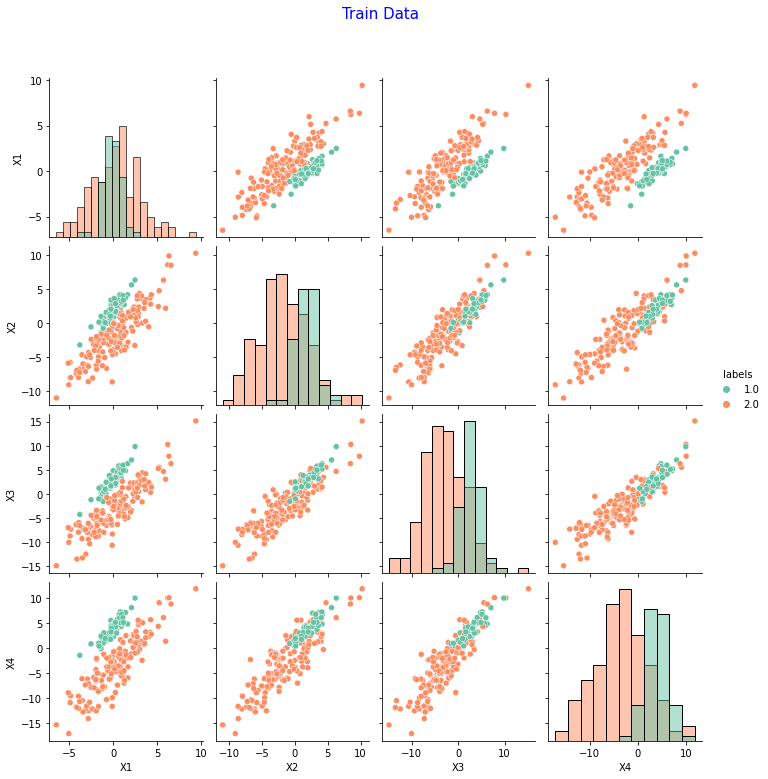

<Figure size 432x288 with 0 Axes>

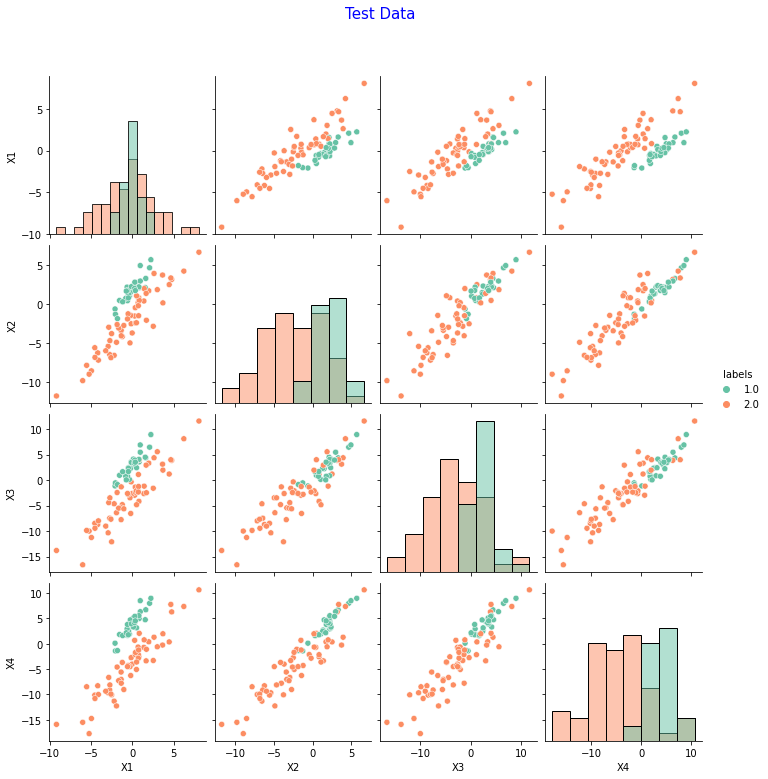

In [53]:
# Pairplot Train Data
plt.figure(1)
f1 = sns.pairplot(TrainData, hue="labels", palette="Set2", diag_kind="hist")
f1.fig.suptitle("Train Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

# Pairplot Test Data
plt.figure(2)
f2 = sns.pairplot(TestData, hue="labels", palette="Set2", diag_kind="hist")
f2.fig.suptitle("Test Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

In [51]:
#Explore the created data set
TestData.head()

,X1,X2,X3,X4,labels
206,-1.084779,-2.905721,-7.921355,-1.274559,2.0
185,0.482040,-3.573444,-6.275129,-7.447688,2.0
110,4.357445,4.136261,1.435779,2.755391,2.0
177,0.458027,-0.810369,-2.983792,-4.754455,2.0
123,6.603951,8.446912,6.308270,8.803425,2.0


In [55]:
#***********************************
# Separate X (features) and Y (target variable)
TrainDataX = TrainData[["X1", "X2","X3","X4"]]
TrainDataY = TrainData["labels"]

TestDataX = TestData[["X1", "X2","X3","X4"]]
TestDataY = TestData["labels"]


#***********************************
#Train Naive Bayes Classifier (using train data)
# We will use Gaussian NB since our data comes from a Gaussian Distribution

model = GaussianNB()
model.fit(TrainDataX, TrainDataY)

#***********************************
# Perform Prediction on Test Data; note that we use features (X) for
# prediction, and class  labels (Y) for comparison 
PredictY = model.predict(TestDataX)
PredictYM = PredictY.astype(int)

# Series to array
ArrayTestX = TestDataX.to_numpy()
ArrayTestY = TestDataY.to_numpy()


#***********************************
# Compare predicted class labels with true class labels
print('True Class Labels')
print(ArrayTestY)
print("\n")

print('Predicted Class Labels')
print(PredictY)
print("\n")

# Print confusion matrix
CF = confusion_matrix(ArrayTestY, PredictY)
print("Confusion Matrix Test Set")
print(CF)
print("\n")

# Print classification report
CP = classification_report(ArrayTestY, PredictY)
print(CP)


True Class Labels
[1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1.
 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2.
 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2.]


Predicted Class Labels
[1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2.
 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2.]


Confusion Matrix Test Set
[[29  4]
 [ 3 54]]


              precision    recall  f1-score   support

         1.0       0.91      0.88      0.89        33
         2.0       0.93      0.95      0.94        57

    accuracy                           0.92        90
   macro avg       0.92      0.91      0.92        90
weighted avg       0.92      0.92      0.92        90



### Data Set 2

<Figure size 432x288 with 0 Axes>

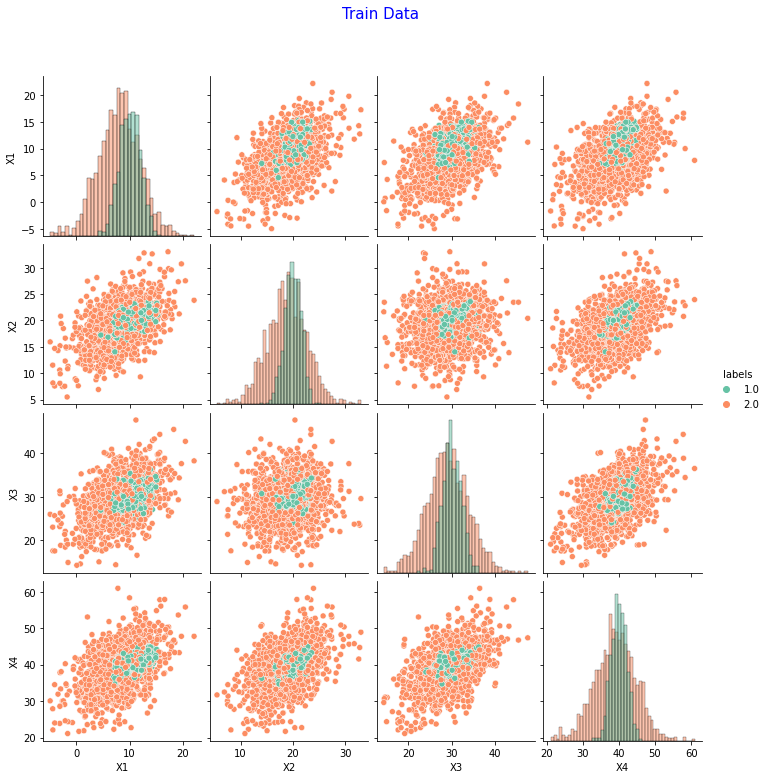

<Figure size 432x288 with 0 Axes>

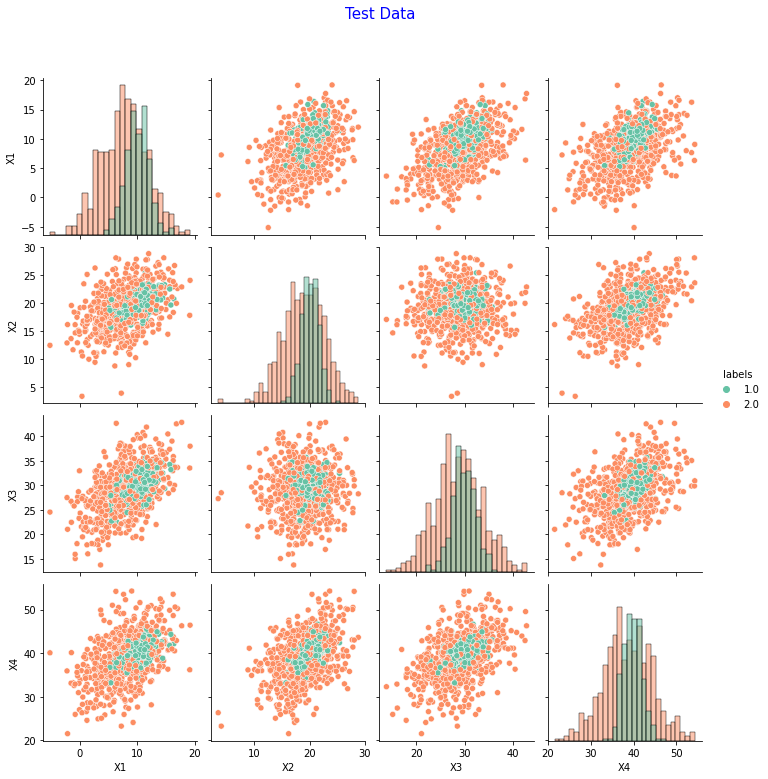

In [66]:
#  Split the data into train-test set in 70-30 ratio. 
dfM = dfM2
TrainData, TestData = train_test_split(dfM, test_size=0.3, shuffle=True)

# Pairplot Train Data
plt.figure(1)
f1 = sns.pairplot(TrainData, hue="labels", palette="Set2", diag_kind="hist")
f1.fig.suptitle("Train Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

# Pairplot Test Data
plt.figure(2)
f2 = sns.pairplot(TestData, hue="labels", palette="Set2", diag_kind="hist")
f2.fig.suptitle("Test Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

In [67]:
#***********************************
# Separate X (features) and Y (target variable)
TrainDataX = TrainData[["X1", "X2","X3","X4"]]
TrainDataY = TrainData["labels"]

TestDataX = TestData[["X1", "X2","X3","X4"]]
TestDataY = TestData["labels"]


#***********************************
#Train Naive Bayes Classifier (using train data)
# We will use Gaussian NB since our data comes from a Gaussian Distribution

model = GaussianNB()
model.fit(TrainDataX, TrainDataY)

#***********************************
# Perform Prediction on Test Data; note that we use features (X) for
# prediction, and class  labels (Y) for comparison 
PredictY = model.predict(TestDataX)
PredictYM = PredictY.astype(int)

# Series to array
ArrayTestX = TestDataX.to_numpy()
ArrayTestY = TestDataY.to_numpy()


#***********************************
# Compare predicted class labels with true class labels
print('True Class Labels')
print(ArrayTestY)
print("\n")

print('Predicted Class Labels')
print(PredictY)
print("\n")

# Print confusion matrix
CF = confusion_matrix(ArrayTestY, PredictY)
print("Confusion Matrix Test Set")
print(CF)
print("\n")

# Print classification report
CP = classification_report(ArrayTestY, PredictY)
print(CP)

True Class Labels
[2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2.
 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2.
 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2.
 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2.
 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2.

### Data Set 3

<Figure size 432x288 with 0 Axes>

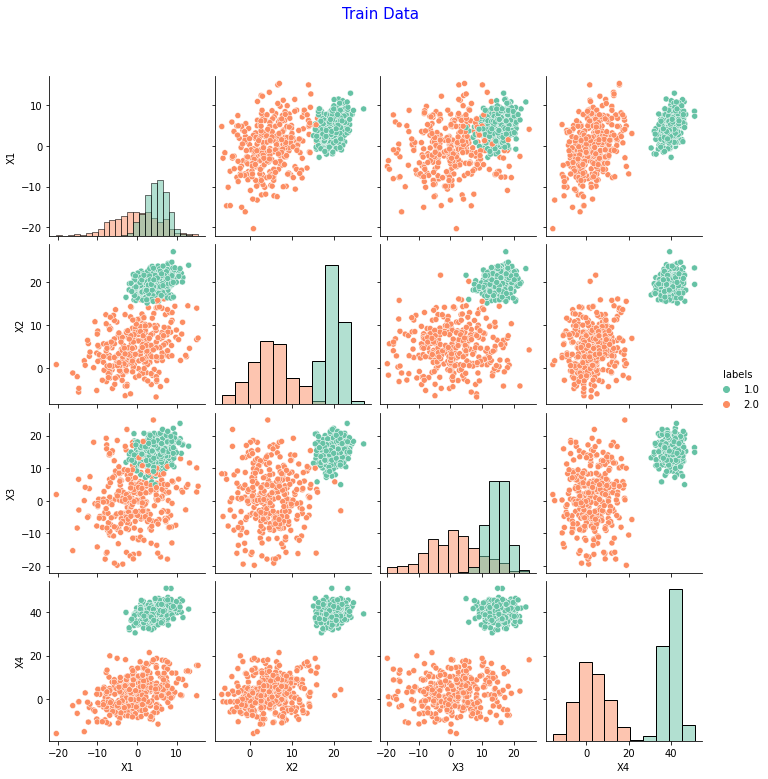

<Figure size 432x288 with 0 Axes>

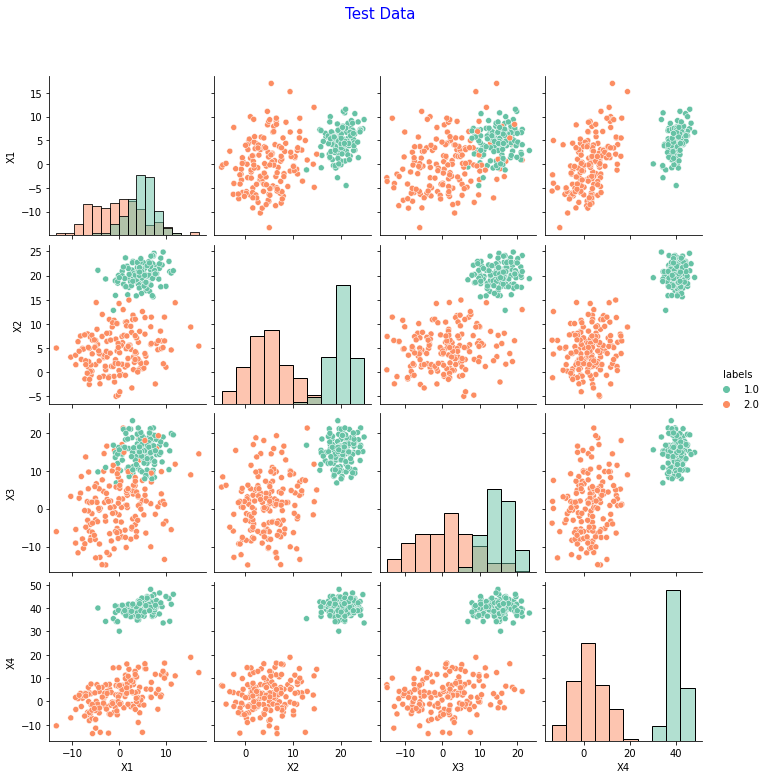

In [70]:
#  Split the data into train-test set in 70-30 ratio. 
dfM = dfM3
TrainData, TestData = train_test_split(dfM, test_size=0.3, shuffle=True)

# Pairplot Train Data
plt.figure(1)
f1 = sns.pairplot(TrainData, hue="labels", palette="Set2", diag_kind="hist")
f1.fig.suptitle("Train Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

# Pairplot Test Data
plt.figure(2)
f2 = sns.pairplot(TestData, hue="labels", palette="Set2", diag_kind="hist")
f2.fig.suptitle("Test Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

In [71]:
#***********************************
# Separate X (features) and Y (target variable)
TrainDataX = TrainData[["X1", "X2","X3","X4"]]
TrainDataY = TrainData["labels"]

TestDataX = TestData[["X1", "X2","X3","X4"]]
TestDataY = TestData["labels"]


#***********************************
#Train Naive Bayes Classifier (using train data)
# We will use Gaussian NB since our data comes from a Gaussian Distribution

model = GaussianNB()
model.fit(TrainDataX, TrainDataY)

#***********************************
# Perform Prediction on Test Data; note that we use features (X) for
# prediction, and class  labels (Y) for comparison 
PredictY = model.predict(TestDataX)
PredictYM = PredictY.astype(int)

# Series to array
ArrayTestX = TestDataX.to_numpy()
ArrayTestY = TestDataY.to_numpy()


#***********************************
# Compare predicted class labels with true class labels
print('True Class Labels')
print(ArrayTestY)
print("\n")

print('Predicted Class Labels')
print(PredictY)
print("\n")

# Print confusion matrix
CF = confusion_matrix(ArrayTestY, PredictY)
print("Confusion Matrix Test Set")
print(CF)
print("\n")

# Print classification report
CP = classification_report(ArrayTestY, PredictY)
print(CP)

True Class Labels
[1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2.
 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2.
 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2.
 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1.
 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2.
 1. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1.
 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1.
 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2.
 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2.]


Predicted Class Labels
[1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 